<a href="https://colab.research.google.com/github/ubettercallsaul/Project-ML1/blob/main/Linear_Regression_SciPy_vs_Torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/linear-regression-with-pytorch-eb6dedead817

In [1]:
def func(x):
  return 10 * x + 10

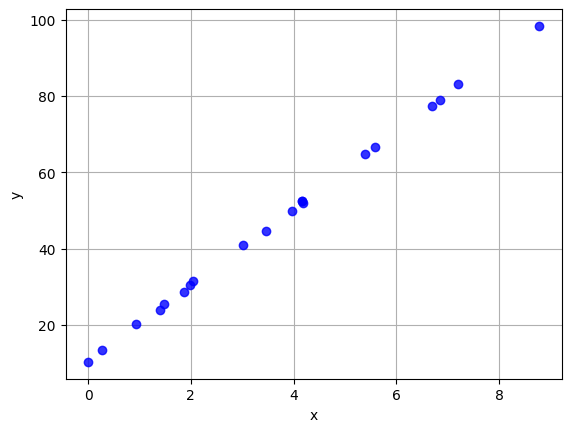

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

x = np.random.rand(20) * 10
# x_val = [i for i in range(5)]
# x = np.array(x_val, dtype=np.float32)
y = func(x) + np.random.rand(20)
# y = func(x)

plt.plot(x, y, 'bo', label='Data', alpha=0.8)
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show()

## SciPy

Linear Regression

R-squared: 0.999817


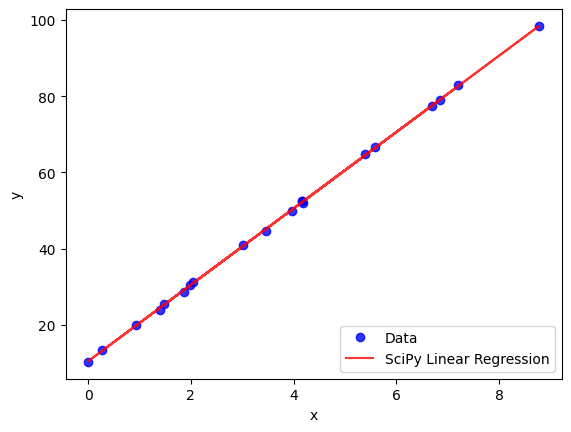

In [3]:
from scipy import stats
res = stats.linregress(x, y)

print(f"R-squared: {res.rvalue**2:.6f}")

plt.plot(x, y, 'bo', label='Data', alpha=0.8)
plt.plot(x, res.intercept + res.slope*x, 'r', label='SciPy Linear Regression', alpha=0.8)
plt.legend(loc='lower right')
plt.ylabel('y')
plt.xlabel('x')
plt.show()


Parameters

In [4]:
from scipy.stats import t
tinv = lambda p, df: abs(t.ppf(p/2, df))
ts = tinv(0.05, len(x)-2)
print(f"slope (95%): {res.slope:.6f} +/- {ts*res.stderr:.6f}")
print(f"intercept (95%): {res.intercept:.6f}"f" +/- {ts*res.intercept_stderr:.6f}")

slope (95%): 10.008594 +/- 0.066995
intercept (95%): 10.519700 +/- 0.294691


## Torch nn

In [5]:
import torch
from torch import nn 
torch.manual_seed(1)


Define Linear Regression class using Neural Network module that contains a linear function

In [6]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super(LinearRegressionModel, self).__init__()
    self.linear = nn.Linear(1, 1)

  def forward(self, x):
    pred = self.linear(x)
    return pred

Initial *point*

In [7]:
model = LinearRegressionModel()
print(model)
print(list(model.parameters()))

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


0.5152631998062134 -0.44137823581695557


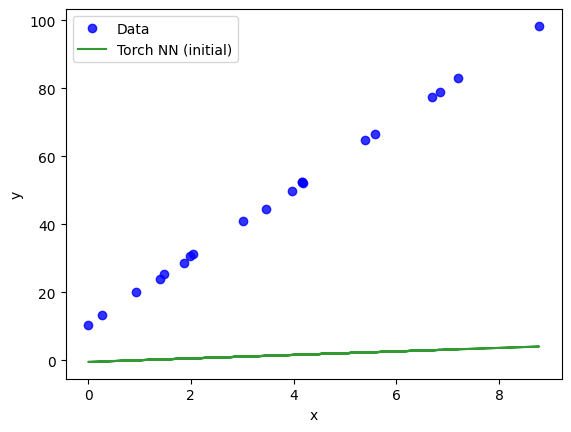

In [8]:
# Torch Tensor
xtt = torch.from_numpy(x.reshape(len(x),-1)).to(torch.float32)
ytt = torch.from_numpy(y.reshape(len(y),-1)).to(torch.float32)

# initial parameters
w, b = model.parameters()
w1, b1 = w[0][0].item(), b[0].item()
print(w1, b1)

plt.clf()
plt.plot(x, y, 'bo', label='Data', alpha=0.8)
plt.plot(x, model(xtt).detach().numpy(), 'g', label='Torch NN (initial)', alpha=0.8)
plt.legend(loc='best')
plt.ylabel('y')
plt.xlabel('x')
plt.show()


Training the model

In [9]:
import torch.optim as optim
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


epochs = 100
losses = []

for epocs in range(epochs):
  optimizer.zero_grad()

  y_pred = model(xtt)
  loss = criterion(y_pred, ytt)
  losses.append(loss.item())
  loss.backward()

  optimizer.step()

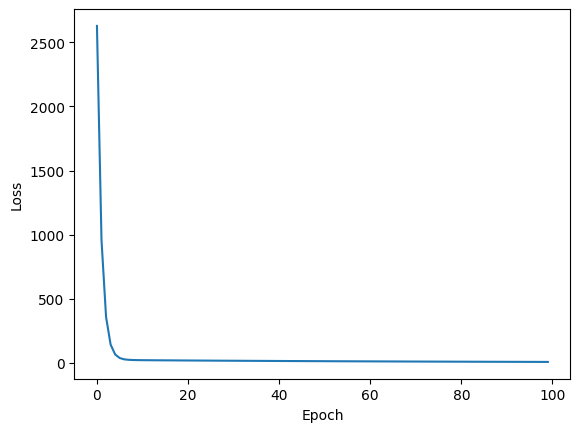

In [10]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

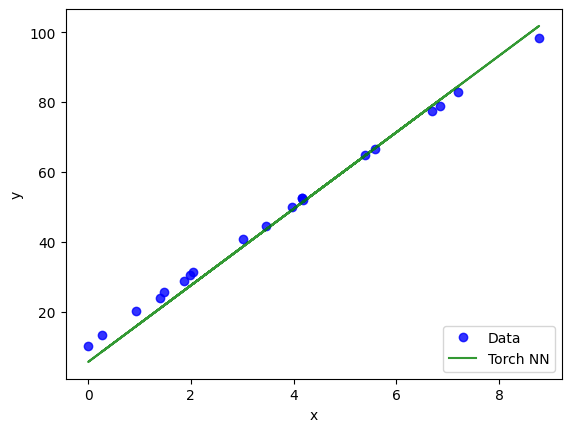

In [11]:
plt.plot(x, y, 'bo', label='Data', alpha=0.8)
plt.plot(x, model(xtt).detach().numpy(), 'g', label='Torch NN', alpha=0.8)
plt.legend(loc='lower right')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

In [12]:
w1, b1 = w[0][0].item(), b[0].item()
print(w1, b1)

10.953008651733398 5.619544982910156


## Comparison

Sum of Squared Error

In [13]:
# Predictions at x
yfit1 = res.intercept + res.slope*x
yfit2 = model(xtt).detach().numpy()

sse1 = np.sum((y-yfit1)**2)
print('SSE1 = ', sse1)

sse2 = np.sum((y-yfit2)**2)
print('SSE2 = ', sse2)


SSE1 =  2.1448843334435375
SSE2 =  516801.6949762841


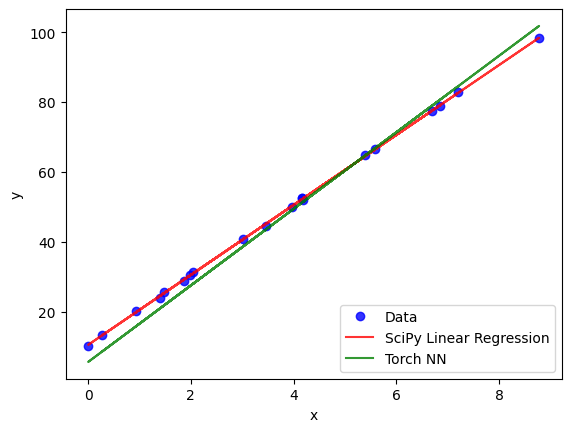

In [14]:
plt.plot(x, y, 'bo', label='Data', alpha=0.8)
plt.plot(x, yfit1, 'r', label='SciPy Linear Regression', alpha=0.8)
plt.plot(x, yfit2, 'g', label='Torch NN', alpha=0.8)
plt.legend(loc='lower right')
plt.ylabel('y')
plt.xlabel('x')
plt.show()